# Actividad 1 
## - Jorge Emiliano Pomar A01709338

* Un dado con 20x20 espacios habilitados
* Número de agentes: (1,5,10)
* Celdas sucias 80% al iniciar
 

In [207]:
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import MultiGrid
from mesa.datacollection import DataCollector
import random

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.rcParams["animation.html"] = "jshtml"
matplotlib.rcParams['animation.embed_limit'] = 2**128

import numpy as np


In [208]:
class Aspiradoras(Agent):
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        
    def step(self):
        x, y = self.pos
        if self.model.grid.is_cell_empty((x, y)):
            self.model.grid.place_agent(None, (x, y), 0)
        else:
            pasos_posibles = self.model.grid.get_neighborhood(self.pos, moore=True, include_center=False)
            nueva_posicion = random.choice(pasos_posibles)
            self.model.grid.move_agent(self, nueva_posicion)

In [209]:
def get_particles(model):
    result = []
    for agent in model.schedule.agents:
        result.append(agent.pos)
    return np.asarray(result)

In [210]:
class OficinaModel(Model):
    def __init__(self, X, Y, num_agents, porc_celdas_sucias, max_tiempo, paso1, paso2, paso3):
        super().__init__()
        self.num_agents = num_agents 
        self.grid = MultiGrid(X, Y, False)
        self.schedule = RandomActivation(self)
        self.running = True
        self.max_tiempo = max_tiempo
        self.tiempo = 0
        self.paso1 = paso1
        self.paso2 = paso2
        self.paso3 = paso3
        self.porcentajes_limpio = []
        self.datacollector = DataCollector(
            model_reporters={"Particles":get_particles}
        )
        
        for i in range(num_agents):
            a = Aspiradoras(i, self)
            x = random.randrange(self.grid.width)
            y = random.randrange(self.grid.height)
            self.schedule.add(a)
            self.grid.place_agent(a, (x, y))
            
    def step(self):
        self.schedule.step()
        self.tiempo += 1
        self.datacollector.collect(self)
        if self.tiempo in self.paso1:
            self.porcentajes_limpio.append(self.calcula_porcentaje_limpio())
        if self.tiempo in self.paso2:
            self.porcentajes_limpio.append(self.calcula_porcentaje_limpio())
        if self.tiempo in self.paso3:
            self.porcentajes_limpio.append(self.calcula_porcentaje_limpio())
        if self.tiempo >= self.max_tiempo:
            self.running = False
    
    
    def calcula_porcentaje_limpio(self):
        limpio = 0
        for y in range(self.grid.height):
            for x in range(self.grid.width):
                if self.grid.is_cell_empty((x, y)):
                    limpio += 1
        return ((limpio/(self.grid.width*self.grid.height)) * 100)

In [211]:
def graficarPruebas(model):
    for y in range(model.grid.height):
        for x in range(model.grid.width):
            if model.grid.is_cell_empty((x, y)):
                plt.scatter(x, y, color='green') # Limpio
            else:
                cell_content = model.grid.get_cell_list_contents([(x, y)])
                if len(cell_content) > 0:
                    plt.scatter(x, y, color='blue') # Aspiradora
                else:
                    plt.scatter(x, y, color='red') # Sucio

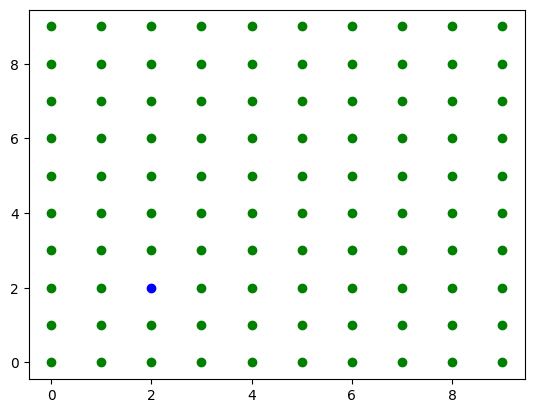

99.0% celdas limpias en paso [500] con 1 aspiradoras en 100 tiempo respectivamente.
99.0% celdas limpias en paso [1000] con 1 aspiradoras en 100 tiempo respectivamente.
99.0% celdas limpias en paso [1500] con 1 aspiradoras en 100 tiempo respectivamente.


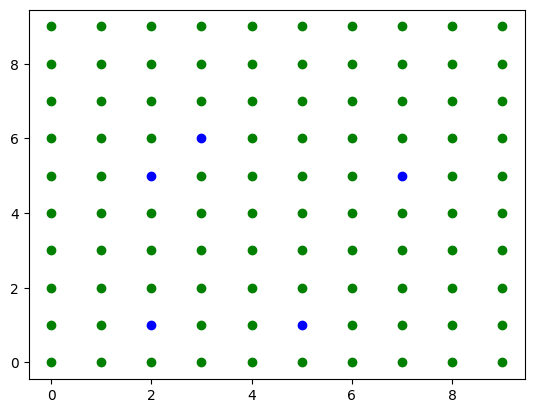

95.0% celdas limpias en paso [500] con 5 aspiradoras en 100 tiempo respectivamente.
95.0% celdas limpias en paso [1000] con 5 aspiradoras en 100 tiempo respectivamente.
95.0% celdas limpias en paso [1500] con 5 aspiradoras en 100 tiempo respectivamente.


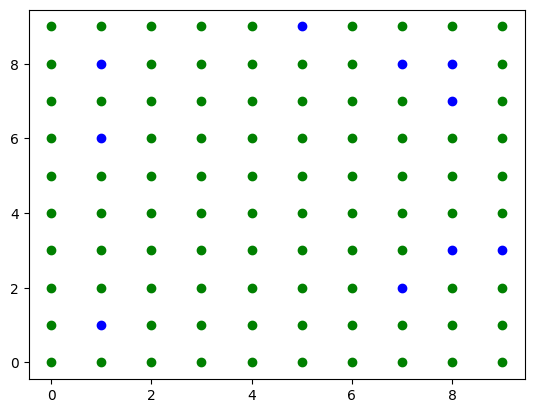

90.0% celdas limpias en paso [500] con 10 aspiradoras en 100 tiempo respectivamente.
90.0% celdas limpias en paso [1000] con 10 aspiradoras en 100 tiempo respectivamente.
90.0% celdas limpias en paso [1500] con 10 aspiradoras en 100 tiempo respectivamente.


In [212]:
def pruebas(X, Y, num_agents, porc_celdas_sucias, max_tiempo, paso1, paso2, paso3):
    model = OficinaModel(X, Y, num_agents, porc_celdas_sucias,  max_tiempo, paso1, paso2, paso3)
    while model.running:
        model.step()
    
    graficarPruebas(model)
    plt.show()
    
    print(f"{model.calcula_porcentaje_limpio()}% celdas limpias en paso {paso1} con {num_agents} aspiradoras en {max_tiempo} tiempo respectivamente.")
    
    print(f"{model.calcula_porcentaje_limpio()}% celdas limpias en paso {paso2} con {num_agents} aspiradoras en {max_tiempo} tiempo respectivamente.")
    
    print(f"{model.calcula_porcentaje_limpio()}% celdas limpias en paso {paso3} con {num_agents} aspiradoras en {max_tiempo} tiempo respectivamente.")
    
# Pruebas
paso1 = [500]
paso2 = [1000]
paso3 = [1500]
# x = 10, y = 10, num_agents = (1,5,10), max_tiempo = 100, porc_celdas_sucias = 0.8, revisa_pasos = [500, 1000, 1500]
pruebas(10, 10, 1, 0.8 , 100, paso1, paso2, paso3)
pruebas(10, 10, 5, 0.8 , 100, paso1, paso2, paso3)
pruebas(10, 10, 10, 0.8 , 100, paso1, paso2, paso3)   